In [2]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.utils.validation import check_random_state

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

data = fetch_olivetti_faces()
targets = data.target

data = data.images.reshape((len(data.images), -1))

Automatically created module for IPython interactive environment


In [3]:
train = data[targets < 30]
test = data[targets >= 30] # testing on independent people

n_faces = 5
rng = check_random_state(4)
face_ids = rng.randint(test.shape[0], size=(n_faces, ))
test = test[face_ids, :]


In [4]:
n_pixels = data.shape[1]
X_train = train[:, :np.ceil(0.5 * n_pixels)]
y_train = train[:, np.floor(0.5 * n_pixels):]
X_test = test[:, :np.ceil(0.5 * n_pixels)]
y_test = test[:, np.floor(0.5 * n_pixels):]

/home/aman/ml/lib/python2.7/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
/home/aman/ml/lib/python2.7/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
/home/aman/ml/lib/python2.7/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/aman/ml/lib/python2.7/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [5]:
# Estimators
ESTIMATORS = {
    "Extra Trees": ExtraTreesRegressor(n_estimators=10, max_features=32,
                                       random_state=0),
    "K-nn": KNeighborsRegressor(),
    "Linear Regression": LinearRegression(),
    "Ridge": RidgeCV()
}


In [6]:
y_test_predict = dict()
for name, estimator in ESTIMATORS.items():
    estimator.fit(X_train, y_train)
    y_test_predict[name] = estimator.predict(X_test)
    
image_shape = (64, 64)
n_cols = 1 + len(ESTIMATORS)

In [7]:
plt.figure(figsize=(2. * n_cols, 2.26 * n_faces))

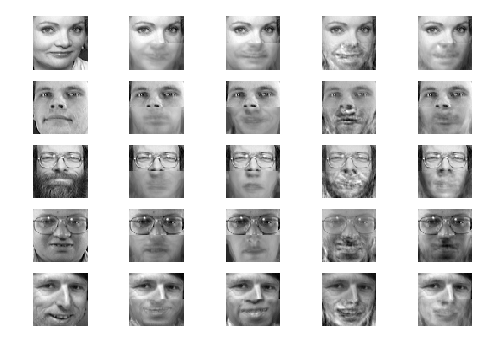

In [18]:
for i in range(n_faces):
    true_face = np.hstack((X_test[i], y_test[i]))
    sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    sub.axis('off')
    sub.imshow(true_face.reshape(image_shape),
               cmap=plt.cm.gray,
               interpolation='nearest')
    
    for j, estimator in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((X_test[i], y_test_predict[estimator][i]))
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)
        sub.axis('off')
        sub.imshow(completed_face.reshape(image_shape),
                   cmap=plt.cm.gray,
                   interpolation='nearest')
    
plt.show()